In [21]:
import pandas as pd
import numpy as np
import json
import os, sys
import matplotlib.pyplot as plt
current_directory = os.getcwd()
sys.path.append(f'{current_directory}/../src/')

from transformers import AutoTokenizer
import keras
import helpers as hp


## 1. Load Data

In [22]:
# Train-Valid data
data = json.load(open(f'{current_directory}/../data/train.json'))

#labels
labels = ["B-EMAIL", "B-ID_NUM", "B-NAME_STUDENT", "B-PHONE_NUM",
        "B-STREET_ADDRESS", "B-URL_PERSONAL", "B-USERNAME",
        "I-ID_NUM", "I-NAME_STUDENT", "I-PHONE_NUM",
        "I-STREET_ADDRESS","I-URL_PERSONAL","O"]

help = hp.helpers(labels,data)

In [23]:
#Convert labels to ids
data = help.labels_to_ids()

## 2. Plot Labels

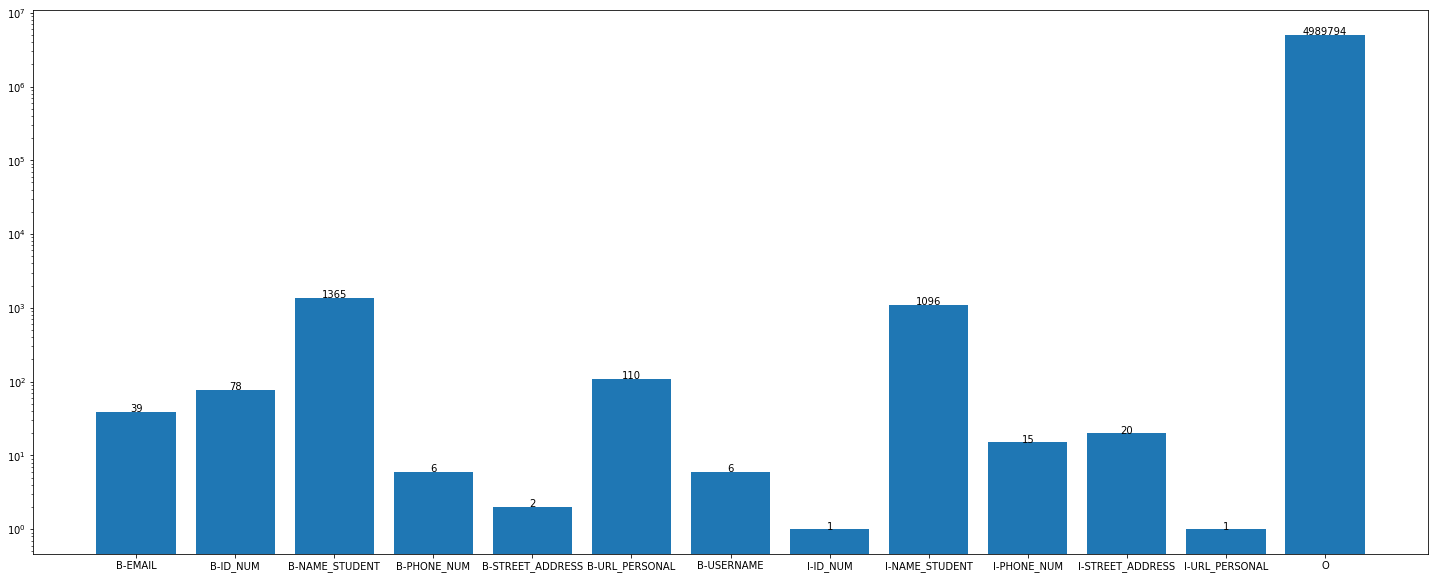

In [24]:
# Get unique labels and their frequency
all_labels = []
for x in data:
    label = x['labels_id']
    for y in label:
        all_labels.append(y)
unique_labels, label_counts = np.unique(all_labels, return_counts=True)
labels_plt = [help.id2label[i] for i in unique_labels]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
plt.figure(figsize =(25, 10))
plt.bar(labels_plt,label_counts)
addlabels(labels_plt, label_counts)
plt.yscale("log")
plt.show()

## 3. Preprocessing

### 3.1 Tokenization

In [25]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
tokenized_data = help.token_data(tokenizer)

#### Example of tokenization

In [33]:
print(f'Words list:\n' + str(data[0]["tokens"][0:15]))
print(f'Tokenized words list:\n' + str(tokenizer.convert_ids_to_tokens(tokenized_data[0]["input_ids"])[0:15]))
print(f'Tokenized list:\n' + str(tokenized_data[0]["input_ids"][0:15]))
print(f'Tokenized words number list:\n' + str(tokenized_data[0].word_ids(batch_index=0)[0:15]))
print(f'Labels list:\n' + str(tokenized_data[0]["labels_ids"][0:15]))

Words list:
['Design', 'Thinking', 'for', 'innovation', 'reflexion', '-', 'Avril', '2021', '-', 'Nathalie', 'Sylla', '\n\n', 'Challenge', '&', 'selection']
Tokenized words list:
['[CLS]', 'design', 'thinking', 'for', 'innovation', 'reflex', '##ion', '-', 'av', '##ril', '2021', '-', 'nat', '##hal', '##ie']
Tokenized list:
[101, 2640, 3241, 2005, 8144, 22259, 3258, 1011, 20704, 15928, 25682, 1011, 14085, 8865, 2666]
Tokenized words number list:
[None, 0, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 9, 9]
Labels list:
[-100, 12, 12, 12, 12, 12, -100, 12, 12, -100, 12, 12, 2, -100, -100]
